<a href="https://colab.research.google.com/github/khalidashani/MscProject/blob/main/DataScience_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

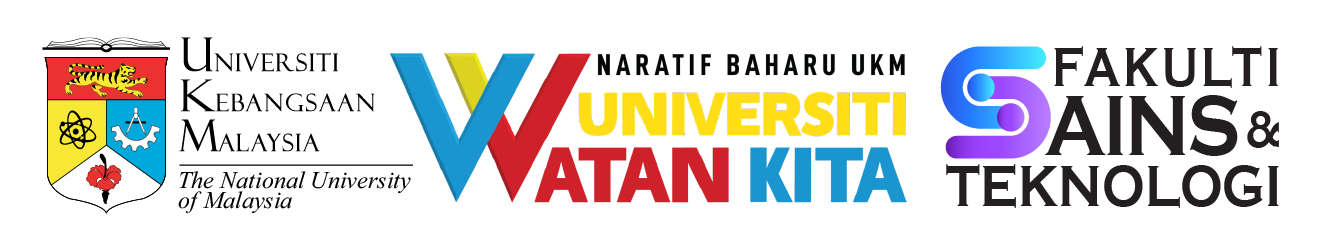

# Project 2
## **STQD6014 Data Science Semester 1 2024/2024**
*Muhammad Khalid Bin Noor Ashani (P146854)*

# **Supermarket Analysis based on Customer Insight, Behaviour and Spending Behaviour**

---

## **Content Outline**
1. [**Introduction**](#intro)

2. [**Problem Statement**](#problem_statement)

3. [**Results and Discussion**](#results)  
    - [Data Cleaning](#data_cleaning)  
    - [Analysis on the Data](#analysis_data)  
        - [Question 1](#question1)  
        - [Question 2](#question2)  
        - [Question 3](#question3)  

4. [**Conclusion**](#summary)

### **Introduction** <a name='intro'></a>

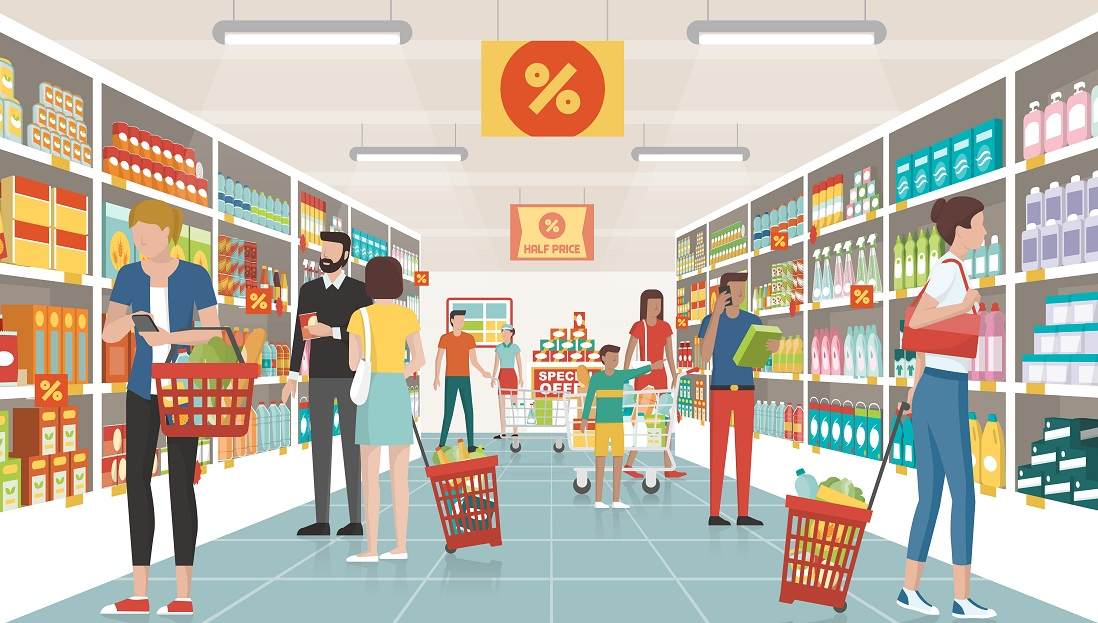

The superstore has accumulated a wealth of valuable data about its customers over time and is eager to harness this information to drive better business outcomes. To unlock the full potential of this data, the store has partnered with a data analytics company that specializes in extracting meaningful insights from complex datasets. By analyzing customer behavior, preferences, and purchase patterns, the goal is to identify key factors that influence decision-making and develop a deeper understanding of what drives customer actions. These insights will help the superstore improve its marketing strategies, personalize customer experiences, and make more informed decisions about product offerings and promotions. Ultimately, the store hopes to use the findings to optimize its operations, enhance customer satisfaction, and create a more effective and targeted approach to future campaigns and business growth. Through this collaboration, the superstore aims to stay ahead of the competition and ensure long-term success by making data-driven decisions.

### **Problem Statement** <a name='problem_statement'></a>

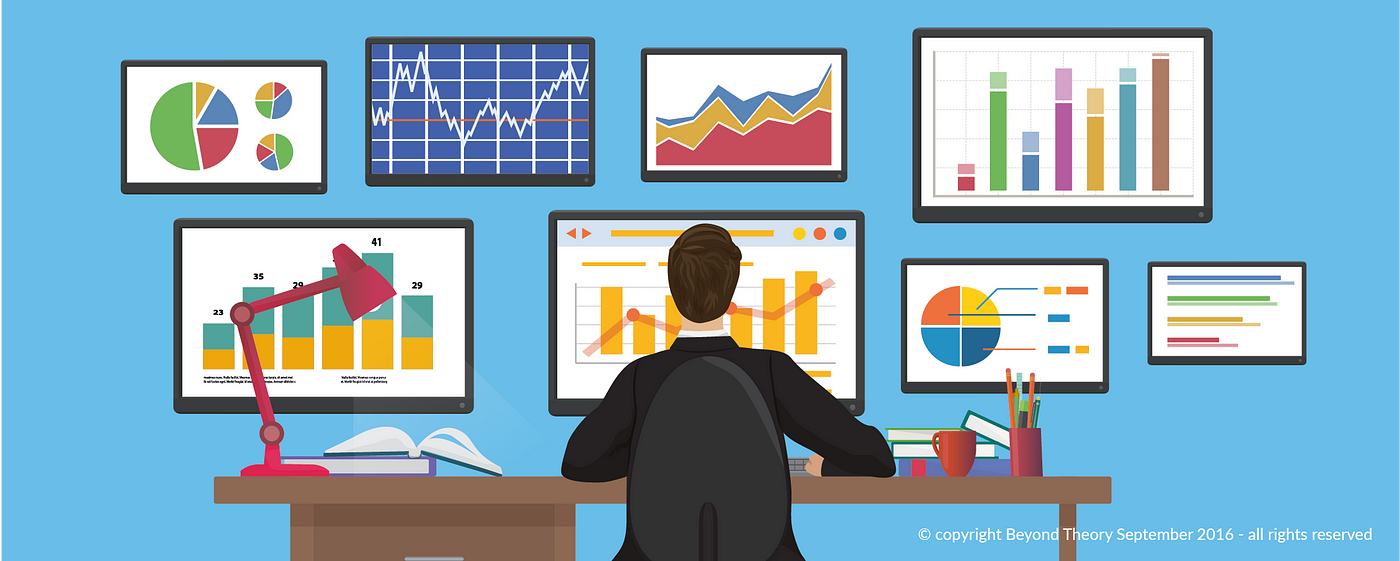

The superstore is looking to understand its customer base better and gain valuable insights into factors influencing customer behavior. The key questions the analysis aims to address include:

1.  What is the demographic profile of the store's customers?

    This question aims to explore the characteristics of the customer base, such as age, gender, location, income levels, and other demographic factors. Understanding the demographic composition will help tailor marketing strategies and product offerings.

2.  Is there a correlation between customers with higher incomes and the number of web purchases?

    This question investigates whether customers with higher income levels are more likely to make purchases through the store’s website. Identifying such correlations can help in targeting high-value customers and improving online sales strategies.

3. Is there any correlation between the different categories of items in the store?

    This question aims to explore the relationships between various product categories, such as whether customers who purchase certain types of items (e.g., electronics) are also more likely to purchase others (e.g., accessories). Understanding these relationships can assist in cross-selling and optimizing store layout or promotional strategies.



### **Results and Discussion** <a name='result'></a>

#### Importing Data in Google Colab

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# assign the file path into path object
path = '/content/drive/MyDrive/P146854_DataScience_Project2/superstore_data.csv'

In [ ]:
# assign the path to data object
data = pd.read_csv(path)

#### Data Cleaning <a name='data_cleaning'></a>

In [ ]:
# look into a portion of the data
print(data.head())

      Id  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  MntFishProducts  MntSweetProducts  \
0   6/16/2014        0       189  ...              111               189   
1   6/15/2014        0       464  ...                7                 0   
2   5/13/2014        0       134  ...               15                 2   
3   11/5/2014        0        10  ...                0                 0   
4    8/4/2014        0         6  ...               11                 0   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurch

In [ ]:
# look into a portion of the data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
from datetime import datetime

# add a new column with the customer age
current_year = datetime.now().year
data['Age'] = current_year - data['Year_Birth']

# grouping the age into different groups
age_bins = [0, 18, 25, 35, 45, 55, 65, 100]
age_labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
data['Age_Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

##### Customer Age Distribution

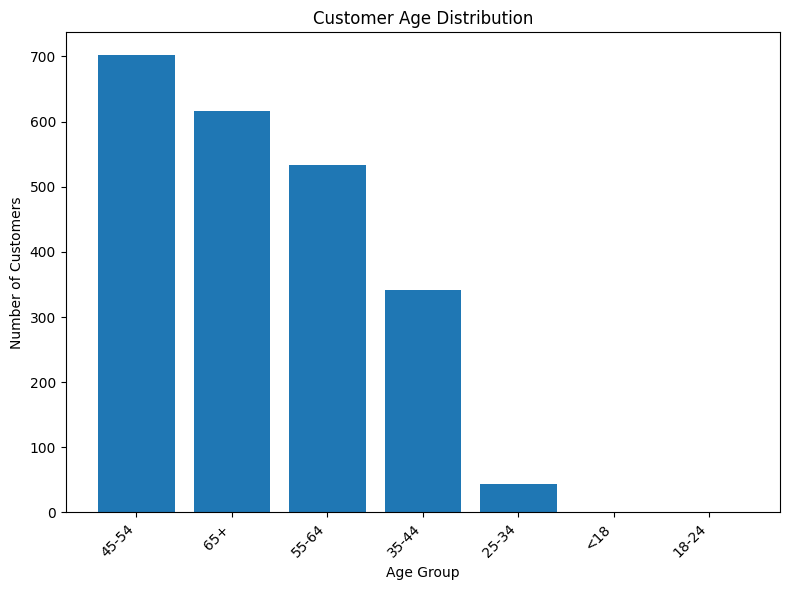

In [ ]:
import matplotlib.pyplot as plt

# Extract the age group distribution from the dictionary
age_group_distribution = age_distribution['Age_Group_Distribution']

# Create the histogram
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.bar(age_group_distribution.index, age_group_distribution.values)
plt.xlabel("Age Group")
plt.ylabel("Number of Customers")
plt.title("Customer Age Distribution")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

Based on the age demographic, most of the customers are aged 45–54, followed by
those aged 65 and above, and 55–64

##### Customer Education Distribution

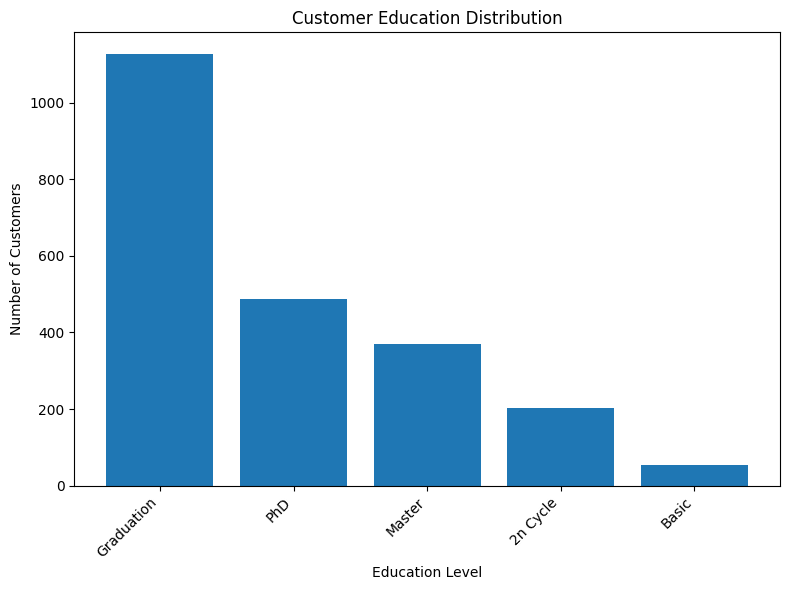

{'Education_Distribution': Education
 Graduation    1127
 PhD            486
 Master         370
 2n Cycle       203
 Basic           54
 Name: count, dtype: int64}

In [ ]:
education_distribution = {'Education_Distribution': data['Education'].value_counts()}
education_distribution

import matplotlib.pyplot as plt # Import the plotting library

education_distribution = {'Education_Distribution': data['Education'].value_counts()}

# --- Bar plot code ---
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.bar(education_distribution['Education_Distribution'].index, education_distribution['Education_Distribution'].values)
plt.xlabel("Education Level")
plt.ylabel("Number of Customers")
plt.title("Customer Education Distribution")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()
# --- End of bar plot code ---

education_distribution

Based on the education demographic, most of the customers are those who graduated from higher education compared to those with only basic education.

##### Marital Status Distribution

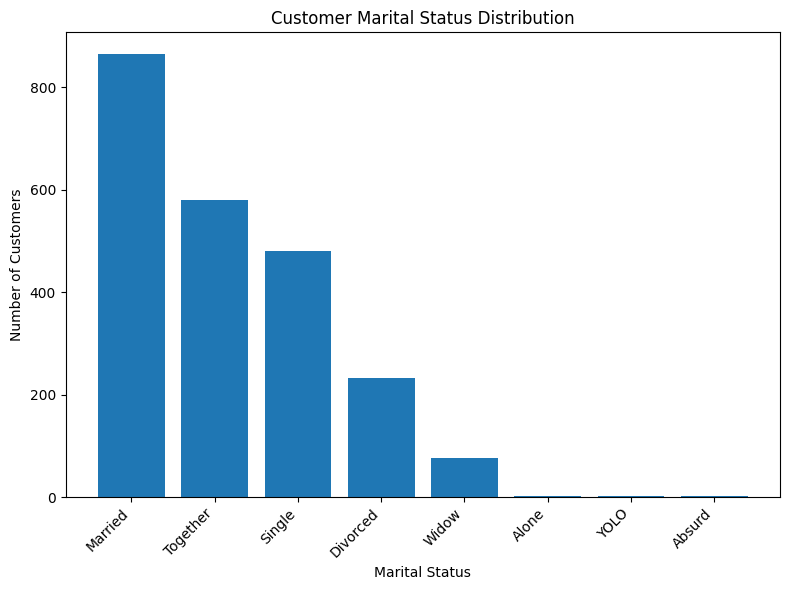

{'Marital_Status_Distribution': Marital_Status
 Married     864
 Together    580
 Single      480
 Divorced    232
 Widow        77
 Alone         3
 YOLO          2
 Absurd        2
 Name: count, dtype: int64}

In [ ]:
maritalstatus_distribution = {'Marital_Status_Distribution': data['Marital_Status'].value_counts()}
maritalstatus_distribution

import matplotlib.pyplot as plt # Import the plotting library

maritalstatus_distribution = {'Marital_Status_Distribution': data['Marital_Status'].value_counts()}

# --- Bar plot code ---
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.bar(maritalstatus_distribution['Marital_Status_Distribution'].index, maritalstatus_distribution['Marital_Status_Distribution'].values)
plt.xlabel("Marital Status")
plt.ylabel("Number of Customers")
plt.title("Customer Marital Status Distribution")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()
# --- End of bar plot code ---

maritalstatus_distribution

Based on the marital status demographic, most of the customers are married or in a relationship compared to those who are single.

With these data, the marketing team can prioritize marketing strategies targeting educated couples aged between 45 and 65.

#### Analysis on the Data <a name='analysis_data'></a>



##### Question 1 <a name='question1'></a>

1. Is there any correlation between educated customers spending more compared to those with a basic education background?

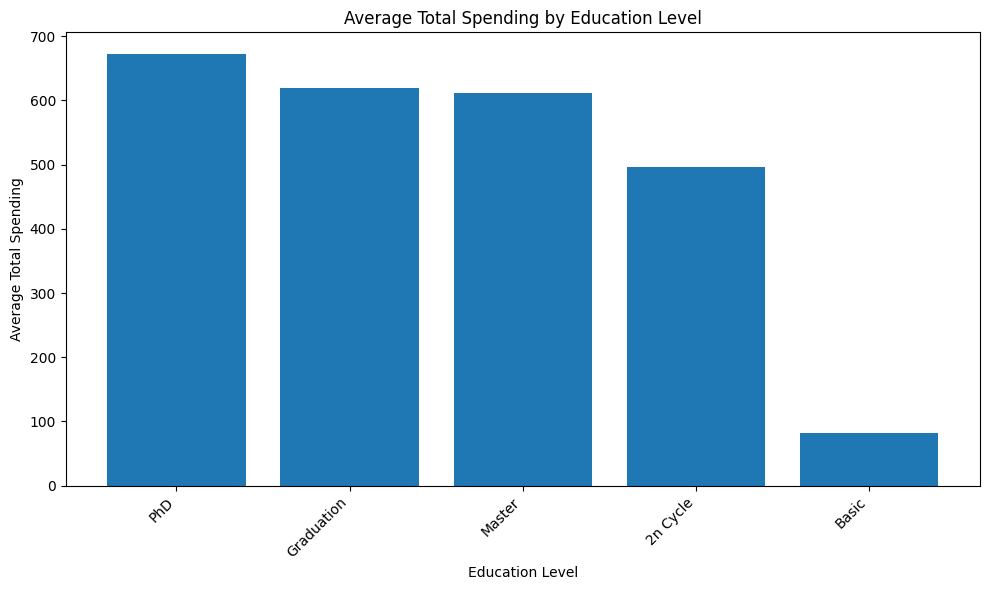

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Calculate total spending for each customer
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts',
                    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data['Total_Spending'] = data[spending_columns].sum(axis=1)

# Group by Education and calculate average spending
education_spending = data.groupby('Education')['Total_Spending'].mean().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(education_spending.index, education_spending.values)
plt.xlabel("Education Level")
plt.ylabel("Average Total Spending")
plt.title("Average Total Spending by Education Level")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Based on the results, customers with higher education spend more compared to those with only a basic education background.

##### Question 2 <a name='question2'></a>

2. Does customer with higher income lead to higher purchase on the web?

Pearson Correlation Coefficient: 0.45881229330232276
P-value: 9.590951512864599e-116


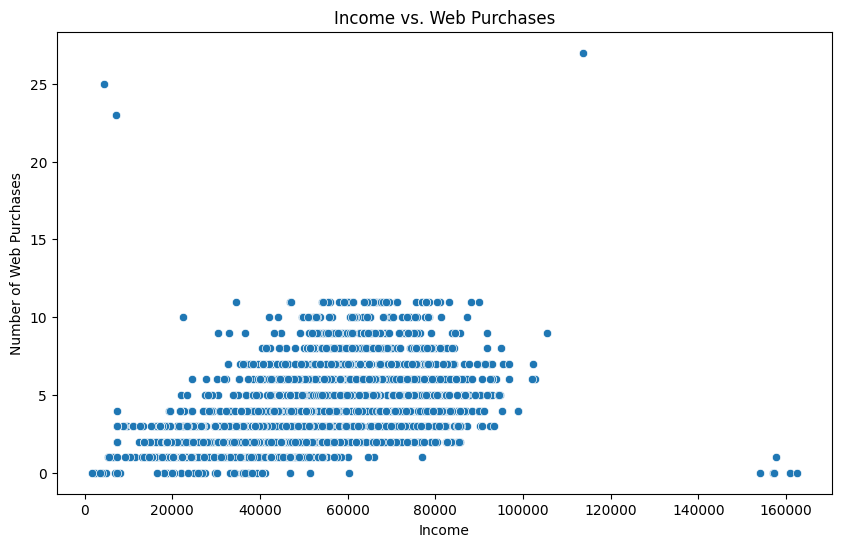

<ipython-input-32-1a1f94791a4d>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Income_Group'] = income_bins
<ipython-input-32-1a1f94791a4d>:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data_filtered.groupby('Income_Group')['NumWebPurchases'].mean()


Average Web Purchases by Income Group:
Income_Group
Low          2.012635
Medium       3.397112
High         5.644404
Very High    5.291139
Name: NumWebPurchases, dtype: float64
Linear Regression Coefficient: 5.843179342010725e-05
Linear Regression Intercept: 1.049086575668349


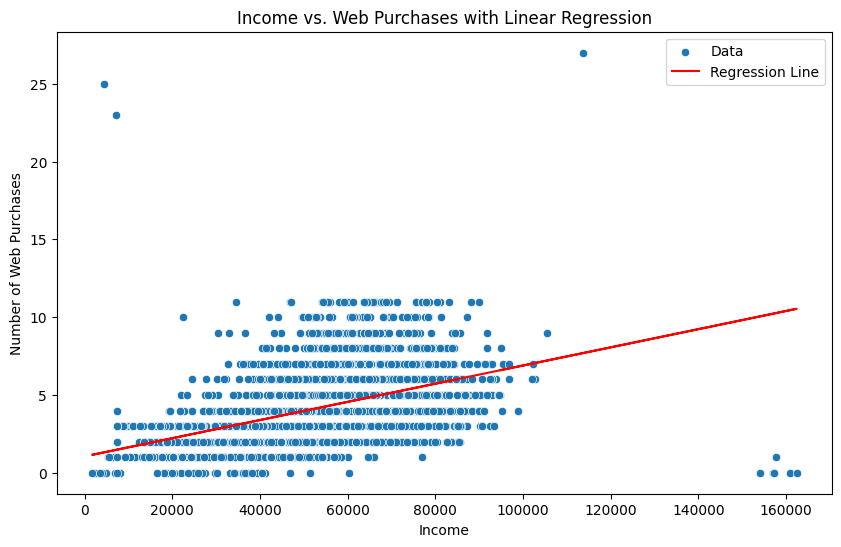

In [ ]:
# Data Science Project 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

# Load the data
path = '/content/drive/MyDrive/P146854_DataScience_Project2/superstore_data.csv'
data = pd.read_csv(path)

# Remove outliers where income is above 600,000
data_filtered = data[data['Income'] <= 600000]

# 1. Calculate Correlation between 'Income' and 'NumWebPurchases'
# Drop rows with missing values in either 'Income' or 'NumWebPurchases'
data_clean_corr = data_filtered.dropna(subset=['Income', 'NumWebPurchases'])

# Calculate correlation on the cleaned data
correlation, p_value = pearsonr(data_clean_corr['Income'], data_clean_corr['NumWebPurchases'])
print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

# 2. Scatter Plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='NumWebPurchases', data=data_filtered)
plt.title('Income vs. Web Purchases')
plt.xlabel('Income')
plt.ylabel('Number of Web Purchases')
plt.show()

# 3. Group by Income (creating bins or quartiles)
income_bins = pd.qcut(data_filtered['Income'], 4, labels=["Low", "Medium", "High", "Very High"])
data_filtered['Income_Group'] = income_bins

# Calculate average 'NumWebPurchases' for each income group
grouped_data = data_filtered.groupby('Income_Group')['NumWebPurchases'].mean()
print("Average Web Purchases by Income Group:")
print(grouped_data)

# 4. Perform Linear Regression
# Prepare the data (drop missing values)
data_clean = data_filtered.dropna(subset=['Income', 'NumWebPurchases'])

X = data_clean[['Income']]  # Independent variable (Income)
y = data_clean['NumWebPurchases']  # Dependent variable (Number of Web Purchases)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Coefficients and intercept
print(f"Linear Regression Coefficient: {model.coef_[0]}")
print(f"Linear Regression Intercept: {model.intercept_}")

# Predict and plot the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='NumWebPurchases', data=data_clean, label="Data")
plt.plot(data_clean['Income'], model.predict(X), color='red', label="Regression Line")
plt.title('Income vs. Web Purchases with Linear Regression')
plt.xlabel('Income')
plt.ylabel('Number of Web Purchases')
plt.legend()
plt.show()

The analysis reveals a moderate positive correlation (0.4588) between income and online purchases, indicating that higher-income customers tend to buy more online. This is statistically significant (p-value: 9.59e-116) and supported by increasing average purchases across rising income groups.

##### Question 3 <a name='question3'></a>

3. Do customers who buy one category of item tend to buy a specific category of item?

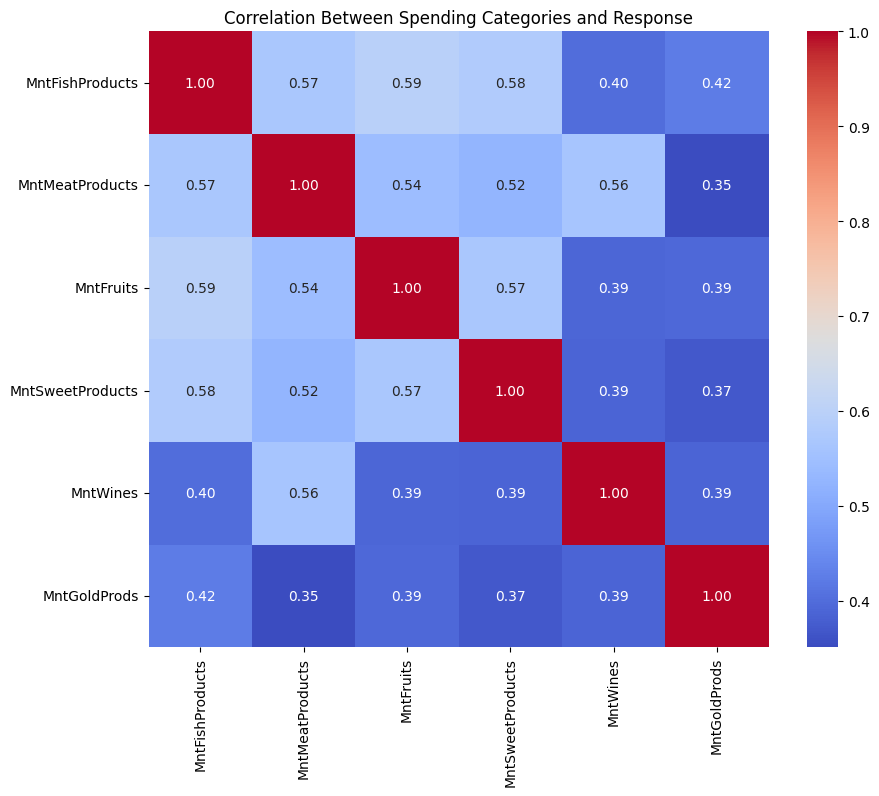

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
path = '/content/drive/MyDrive/P146854_DataScience_Project2/superstore_data.csv'
data = pd.read_csv(path)

# Extract the spending-related columns and the Response column
spending_columns = ["MntFishProducts","MntMeatProducts","MntFruits",
    "MntSweetProducts","MntWines","MntGoldProds"]

# Compute correlation matrix
correlation_matrix = data[spending_columns].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Spending Categories and Response")
plt.show()


Based on the heatmap, the highest correlation strength is 0.59, observed between MntFishProducts and MntFruits, followed by MntFishProducts and MntSweetProducts at 0.58, and MntFishProducts and MntSweetProducts at 0.57.

With this data, the analytics team suggests that the store manager arrange the categories with the highest correlation values close to each other to boost sales.

### **Conclusion** <a name='summary'></a>

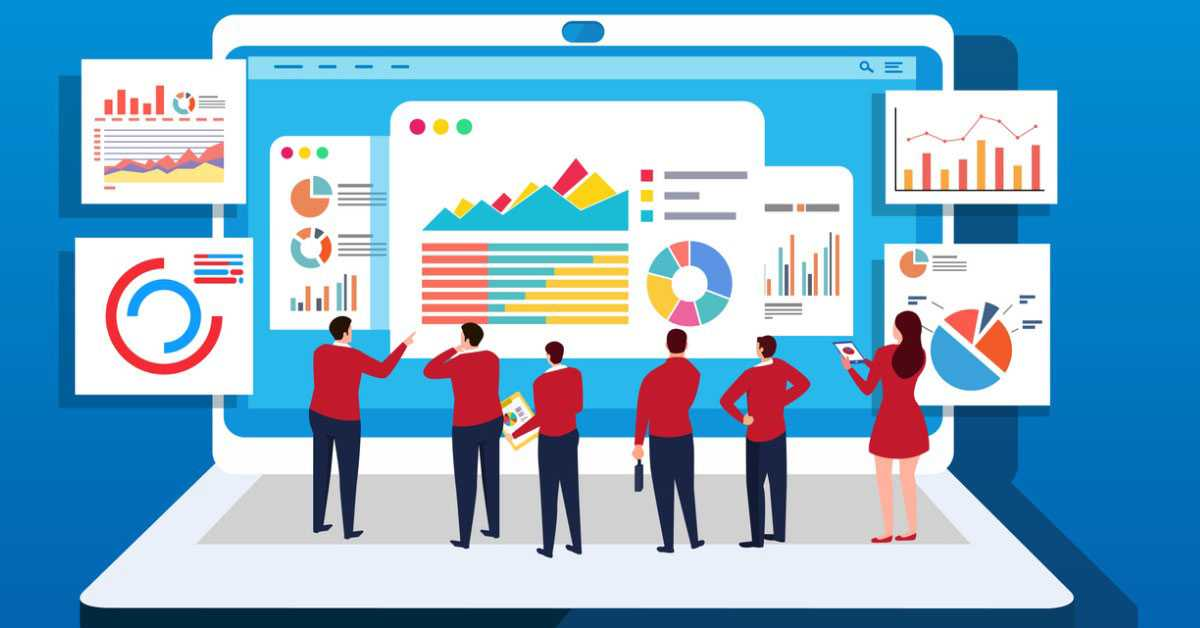
>
The analysis of customer demographics and purchasing behavior has provided valuable insights for the superstore. The findings reveal that most of the store’s customers are well-educated, with a significant portion holding higher education degrees. Additionally, the majority of customers fall within the age group of 45–54, with a strong presence of customers aged 65 and above. The marital status data indicates that most customers are married or in relationships, providing a target audience for marketing strategies. These insights suggest that the marketing team should prioritize efforts toward educated couples aged between 45 and 65, as this group shows the highest engagement with the store’s offerings. Further, the analysis demonstrates that customers with higher education backgrounds tend to spend more, reinforcing the importance of targeting this demographic. The correlation between income and online purchases highlights that higher-income customers are more likely to shop online, with a moderate positive correlation (0.4588) and statistically significant results. Lastly, the analysis of product categories reveals strong correlations between items such as fish products, fruits, and sweets, suggesting that cross-promotion and strategic product placement could drive higher sales. These findings provide actionable insights that can help the superstore refine its marketing efforts, optimize its product offerings, and ultimately increase customer engagement and sales.